In [93]:
# imports necessários para os programas
import numpy as np
import matplotlib.pyplot as plt

# condições iniciais
t0 = 0
tf = 10*np.pi
x0 = 1
v0 = 0

num_pontos = 1000

# Oscilador Harmônico
---

## 1. Introdução

Podemos definir o oscilador harmônico como um sistema consistido de uma massa $m$ sob ação de uma força restauradora $-kx$, onde $k$ e $m$ são constantes. A equação do movimento unidimensional pode ser expressa como:

$$\ddot{x} + \frac{k}{m} x  = 0$$

Chamando $\omega_0^2 = \frac{k}{m}$ podemos reescrever a equação como:

$$\ddot{x} + \omega_0^2 x = 0$$

### 1.1. Observação

Neste trabalho, a fim de facilitar os cálculos, utilizaremos $\omega_0 = 1$, $\phi = 0°$, $A = 1$

---

## 2. Solução numérica
A solução geral do oscilador harmônico é dada por:
$$x = A cos(\omega_0 t + \phi)$$

Onde a amplitude $A$ e a fase inicial $\phi$ são determinadas através de condições iniciais. Podemos escrever um programa em python para calcular tal função:

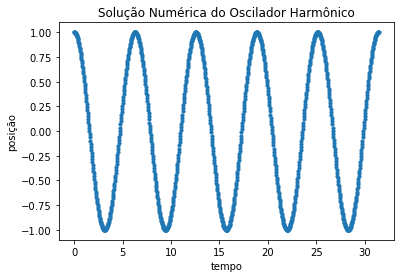

In [94]:
tl = np.linspace(t0,tf,num_pontos) #array de comprimento 1000 indo de 0 a 4*pi

xl_an = np.cos(tl)

plt.scatter(tl, xl_an, s=10)
plt.title("Solução Numérica do Oscilador Harmônico")
plt.ylabel("posição")
plt.xlabel("tempo")

plt.show()

## 3. Métodos

Usaremos os Métodos Euler-Cromer, Velocity-Verlet e RK4 para analizar o problema, e os compararemos com a solução numérica.



### 3.1. Euler-Cromer

Para resolvermos por Euler-Cromer, separaremos a EDO de segunda ordem em duas de primeira ordem, uma em relação à velocidade, e uma em relação à posição:

$$ \frac{dv}{dt} = -\omega_0^2 x$$

$$ \frac{dx}{dt} = v(t) $$

Considerando que uma diferencial nada mais é que uma variação, onde $\Delta{t}\rightarrow 0$, podemos reescrever $\frac{dx}{dt}$ como $\frac{\Delta{x}}{\Delta{t}}$. O mesmo acontece com a diferencial da velocidade. Assim:

$$v_{n+1} = V_n - \omega_0^2 x \Delta{t} $$

$$x_{n+1} = x_n + v_{n+1} \Delta{t}$$

Podemos agora escrever-lo em python:

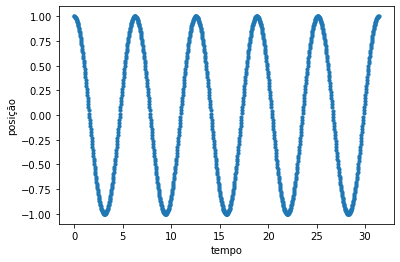

In [95]:
t = t0
x = x0
v = v0

tl = [t]
xl_cromer = [x] 
dt = (tf - t)/num_pontos

for n in range(1, num_pontos):
    v += -x *dt
    x += v * dt
    t += dt
    tl.append(t)
    xl_cromer.append(x)
    
plt.scatter(tl, xl_cromer, s=10)
plt.ylabel("posição")
plt.xlabel("tempo")

plt.show()

### 3.2. Velocity-Verlet

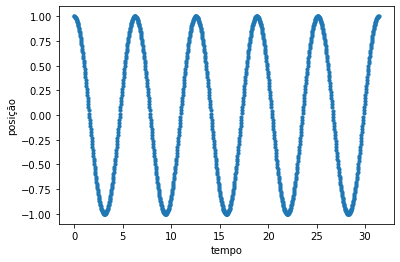

In [96]:
t = t0
x = x0
v = v0

tl = [t0]
xl_verlet = [x0]
dt = (tf - t0)/num_pontos

v += -x *dt
xl_verlet.append(x + v * dt)
t += dt
tl.append(t)

for n in range(1, num_pontos-1):
    
    x = 2 * xl_verlet[n] - xl_verlet[n-1] - xl_verlet[n] * dt**2
    t += dt
    tl.append(t)
    xl_verlet.append(x)

   
plt.scatter(tl, xl_verlet, s=10)
plt.ylabel("posição")
plt.xlabel("tempo")

plt.show()

### Euler Explícito

1000
1000


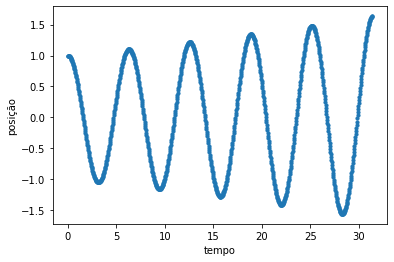

In [97]:
t = t0
x = x0
v = v0

xl_ex = [x0]
dt = (tf - t0)/num_pontos


for n in range(1, num_pontos):
    vt = v
    v += -x*dt
    x += vt*dt
    
    xl_ex.append(x)
    
print(len(tl))
print(len(xl_ex))
   
plt.scatter(tl, xl_ex, s=10)
plt.ylabel("posição")
plt.xlabel("tempo")

plt.show()

### Runge-Kutta 4

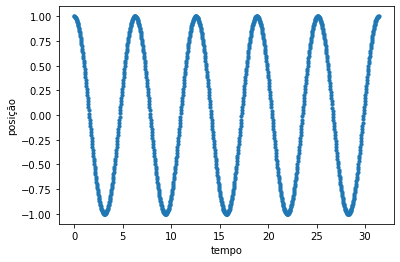

In [98]:
def fv(x):
    return -x

def fx(v):
    return v

t = t0
x = x0
v = v0

xl_rk4 = [x0]
dt = (tf - t0)/num_pontos



for n in range(1, num_pontos):
    vk1 = fv(x)   
    vk2 = fv(x + dt*vk1/2)
    vk3 = fv(x + dt*vk2/2)  
    vk4 = fv(x + dt*vk3)
    
    v += dt*(vk1+2*vk2+2*vk3+vk4)/6
    
    xk1 = fx(v)
    xk2 = fx(v + dt*xk1/2)
    xk3 = fx(v + dt*xk2/2)
    xk4 = fx(v + dt*xk3)
    
    x += dt*(xk1+2*xk2+2*xk3+xk4)/6
    
    
    xl_rk4.append(x)

plt.scatter(tl, xl_rk4, s=10)
plt.ylabel("posição")
plt.xlabel("tempo")

plt.show()

### Erro

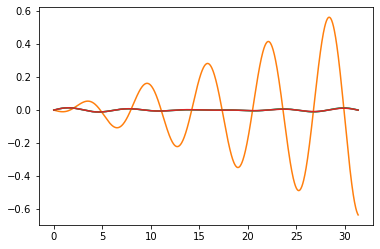

In [112]:
xe_cr = xl_an - xl_cromer
xe_ex = xl_an - xl_ex
xe_vl = xl_an - xl_verlet
xe_rk = xl_an - xl_rk4

plt.plot(tl, xe_cr)
plt.plot(tl, xe_ex)
plt.plot(tl, xe_vl)
plt.plot(tl, xe_rk)

plt.show()